In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


## Making a categorical variable from numerical input

#### BMI category

In [4]:
def bmi_category(x):
    if x < 18.5:
        category = 0 # underweight
    elif x >= 18.5 and x < 25:
        category = 1 # healthy
    elif x >=25 and x < 30:
        category = 2 # overweight
    else:
        category = 3 # obese
    return category

In [5]:
df['BMICategory'] = df['BMI'].apply(bmi_category)

In [6]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMICategory
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,3
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,1
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,3
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,2
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,3


#### Age category

In [7]:
def age_category(x):
    return str(int(np.floor(x/10))) + '0s'

In [8]:
df['AgeCategory'] = df['Age'].apply(age_category)

In [9]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMICategory,AgeCategory
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,3,20s
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,1,20s
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,3,20s
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,2,40s
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,3,20s


## Visualizing categorical variables

### Pie chart

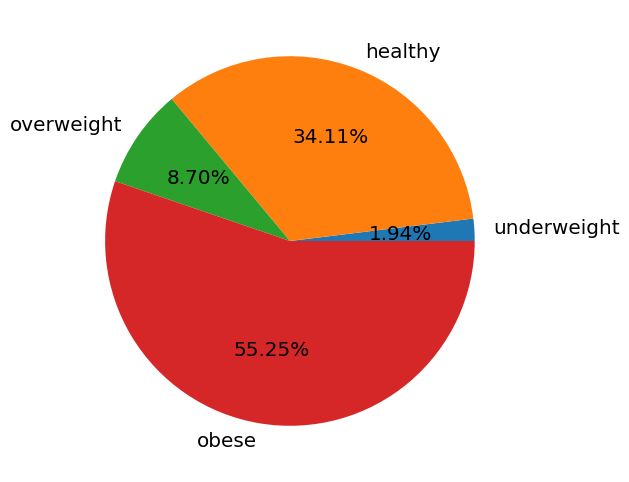

In [10]:
labels = ['underweight','healthy','overweight','obese']
plt.figure(figsize=(6, 6))
df.groupby('BMICategory').size().plot(kind = 'pie', labels = labels, autopct='%.2f%%', textprops={'size': 'x-large'}); 

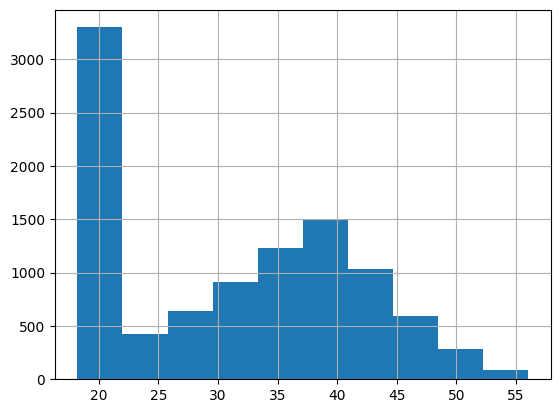

In [11]:
# Comparison with previously made histogram
df['BMI'].hist();

### Bar chart

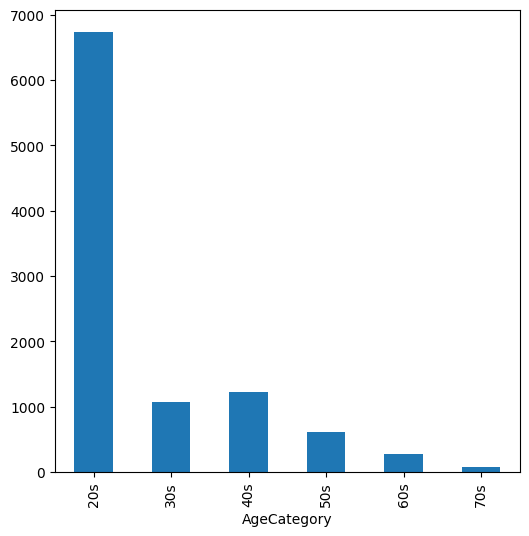

In [12]:
plt.figure(figsize=(6, 6))
df.groupby('AgeCategory').size().plot(kind = 'bar');

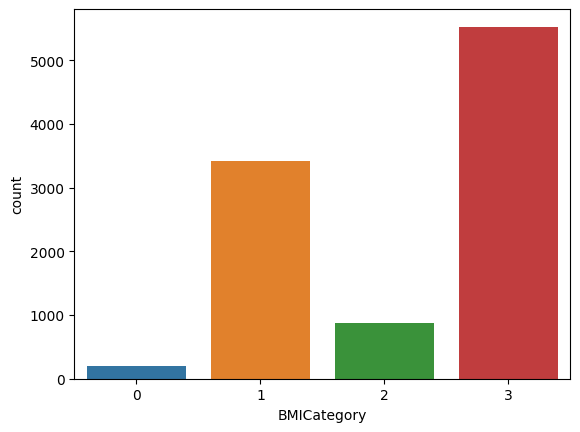

In [13]:
sns.countplot(x="BMICategory", data=df);

# Task 6

## Visualize age and bmi relationship

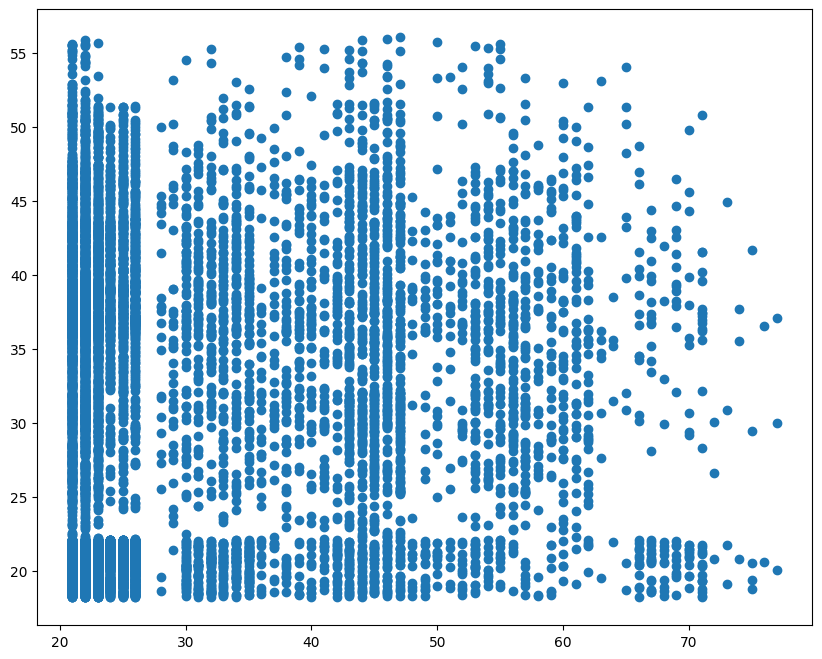

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Age'],df['BMI'])
plt.show()

In [15]:
crosstab = pd.crosstab(df['AgeCategory'],df['BMICategory'])

In [16]:
crosstab

BMICategory,0,1,2,3
AgeCategory,,,,
20s,145,2563,437,3590
30s,24,364,90,596
40s,15,270,194,750
50s,5,104,112,393
60s,3,74,32,164
70s,2,36,5,32


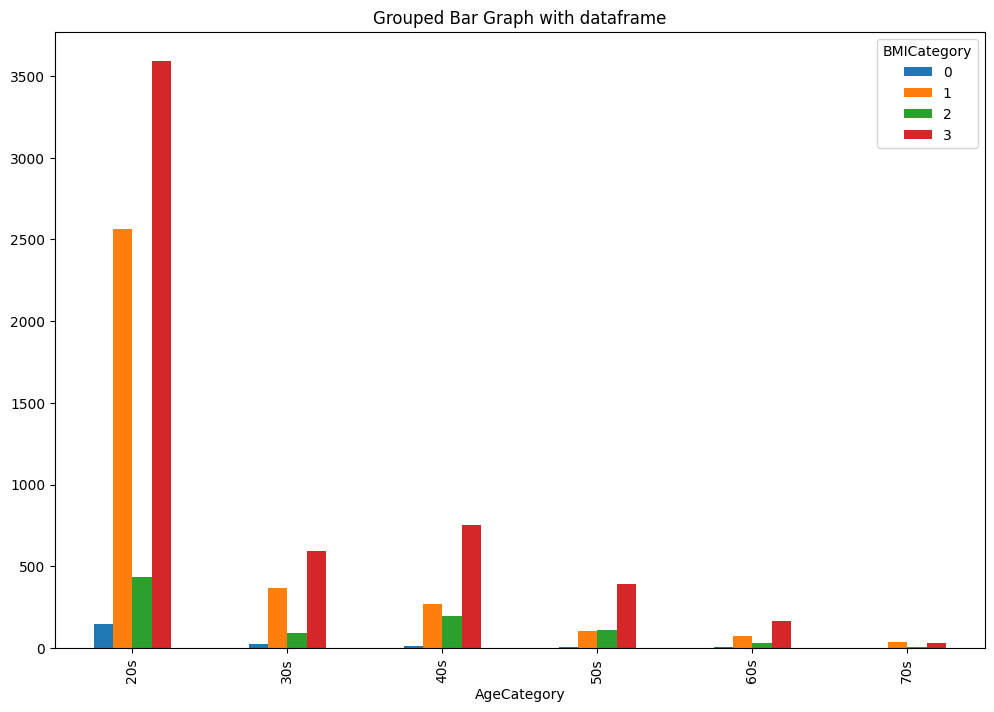

In [17]:
crosstab.plot(kind='bar', stacked=False, title='Grouped Bar Graph with dataframe', figsize=(12,8));

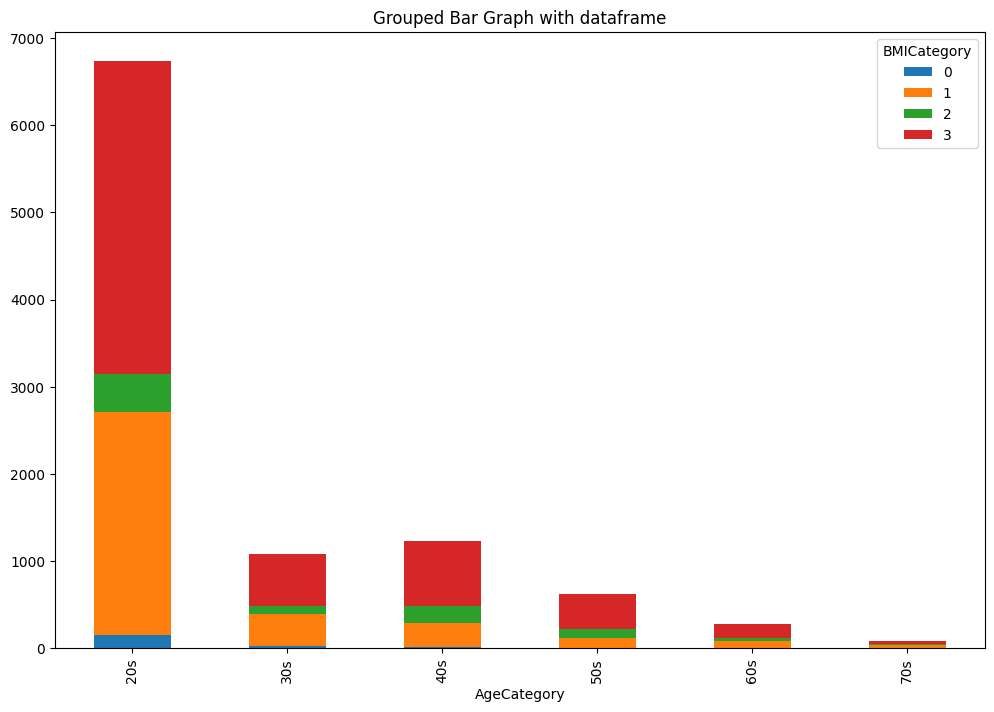

In [18]:
crosstab.plot(kind='bar',stacked=True, title='Grouped Bar Graph with dataframe', figsize=(12,8));

### Visualize diabetes and age

#### Diabetic people of each age category

In [19]:
df.groupby(['AgeCategory','Diabetic']).size()

AgeCategory  Diabetic
20s          0           5323
             1           1412
30s          0            693
             1            381
40s          0            305
             1            924
50s          0            147
             1            467
60s          0            113
             1            160
70s          0             75
dtype: int64

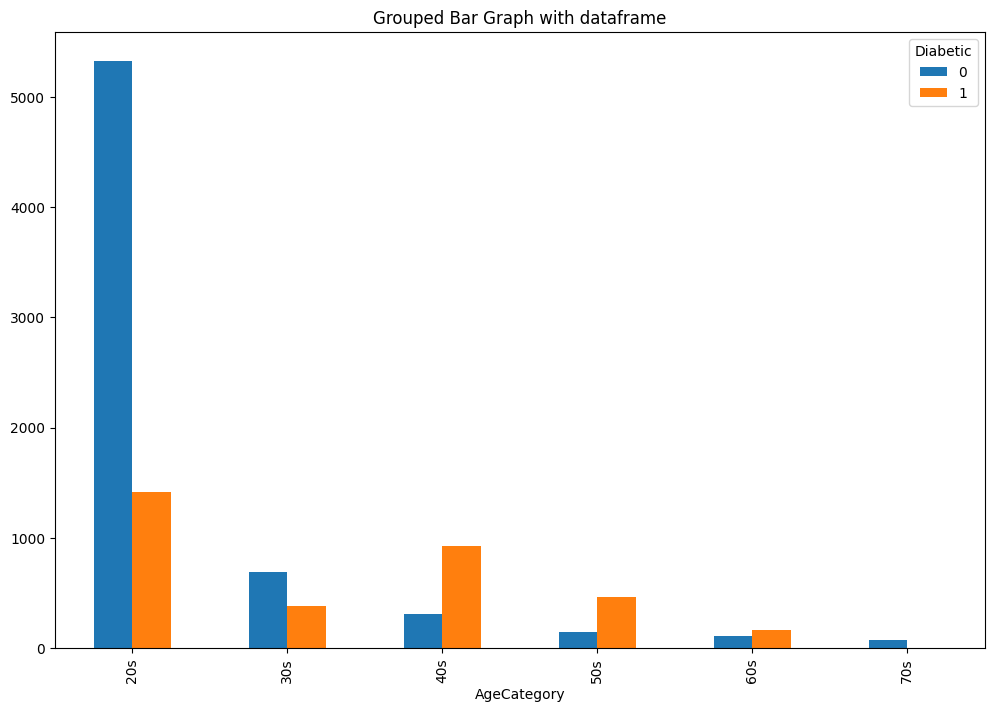

In [20]:
table = pd.crosstab(df['AgeCategory'],df['Diabetic'],margins = False)
table.plot(kind='bar', stacked=False, title='Grouped Bar Graph with dataframe', figsize=(12,8));

In [21]:
# pandas dataframe query
df[(df['Diabetic']==1) & (df['Age']>=70)]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMICategory,AgeCategory


#### Violin plot

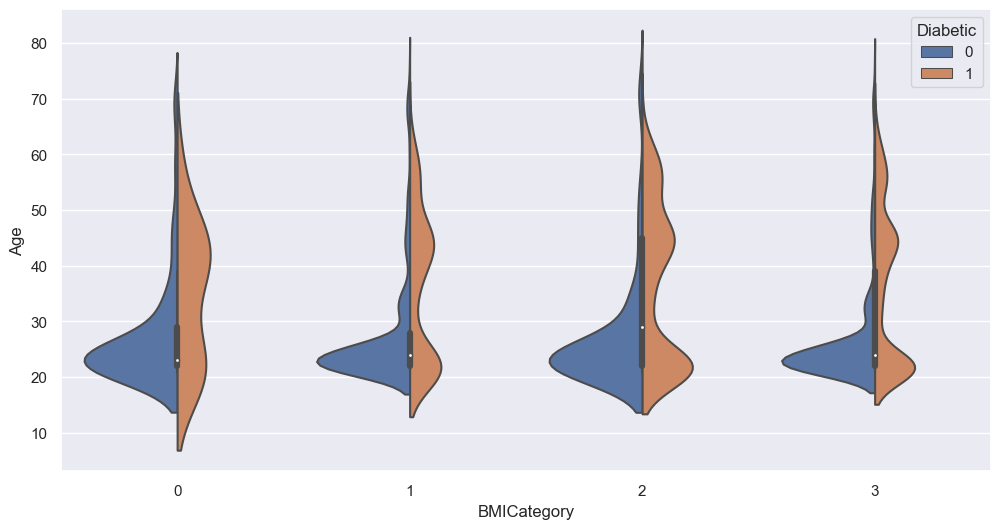

In [22]:
sns.set(rc = {'figure.figsize':(12,6)})
violin = sns.violinplot(data=df, hue='Diabetic', y='Age', x='BMICategory', split=True)

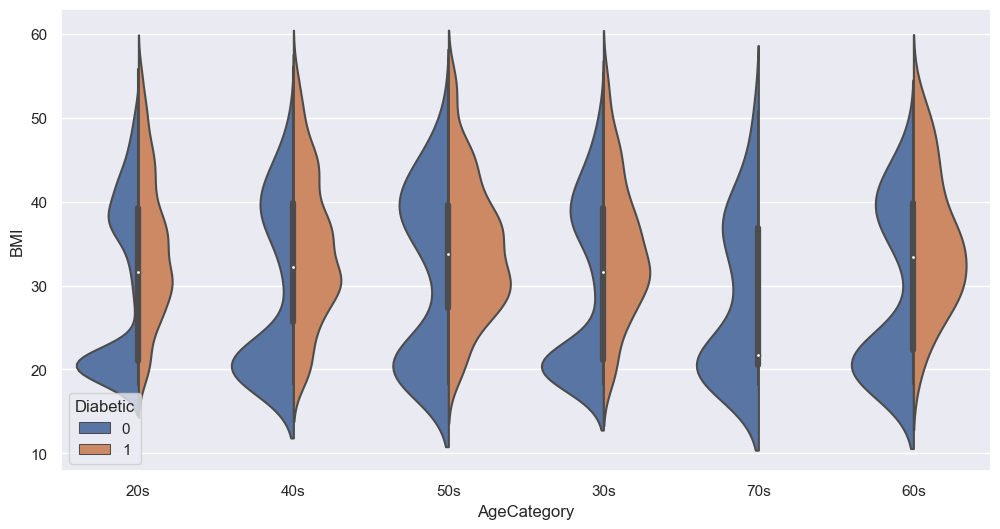

In [23]:
sns.set(rc = {'figure.figsize':(12,6)})
violin = sns.violinplot(data=df, hue='Diabetic', y='BMI', x='AgeCategory', split=True)